In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = os.path.join(os.getcwd(), "data", "clean_data.csv")
df = pd.read_csv(file_path)

In [51]:
df = df[df["Regions"] != "The Netherlands"]
df = df[df["Travel motives"] == "Total"]
df = df[df["Travel modes"] != "Total"]
df["Travel modes"] = df["Travel modes"].replace(
    {"Passenger car (driver)": "Car", "Passenger car (passenger)": "Car"}
)

In [52]:
df = df[df['Year'].between(2018.0, 2023.0)]
gemiddelde = df.groupby(['Regions','Travel modes'])['Average number of trips per person per year'].mean().reset_index()

In [53]:
totals = gemiddelde.groupby('Regions')['Average number of trips per person per year'].sum().reset_index()
totals = totals.rename(columns={'Average number of trips per person per year': 'totaltrips'})
gemiddelde = gemiddelde.merge(totals, on='Regions', how='left')
gemiddelde['percentage'] = (gemiddelde['Average number of trips per person per year'] / gemiddelde['totaltrips']) * 100
print(gemiddelde)


              Regions    Travel modes  \
0        Drenthe (PV)            Bike   
1        Drenthe (PV)  Bus/tram/metro   
2        Drenthe (PV)             Car   
3        Drenthe (PV)           Other   
4        Drenthe (PV)           Train   
..                ...             ...   
67  Zuid-Holland (PV)  Bus/tram/metro   
68  Zuid-Holland (PV)             Car   
69  Zuid-Holland (PV)           Other   
70  Zuid-Holland (PV)           Train   
71  Zuid-Holland (PV)         Walking   

    Average number of trips per person per year  totaltrips  percentage  
0                                    250.333333  704.333333   35.541884  
1                                           NaN  704.333333         NaN  
2                                    252.833333  704.333333   35.896829  
3                                     44.500000  704.333333    6.318031  
4                                           NaN  704.333333         NaN  
..                                          ...         ...    

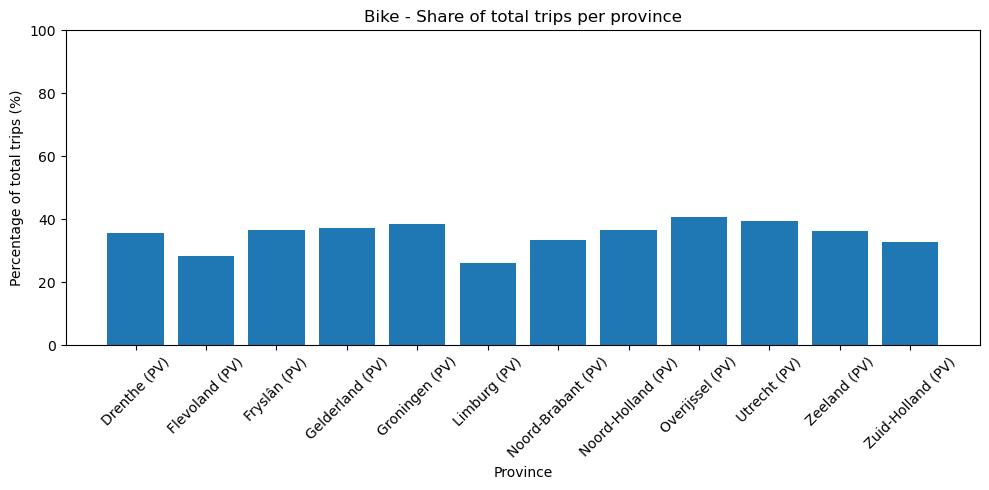

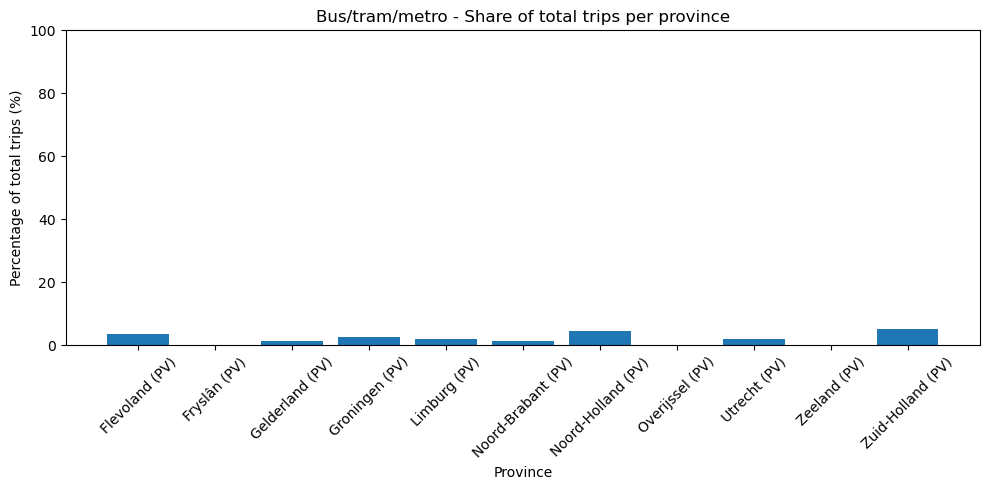

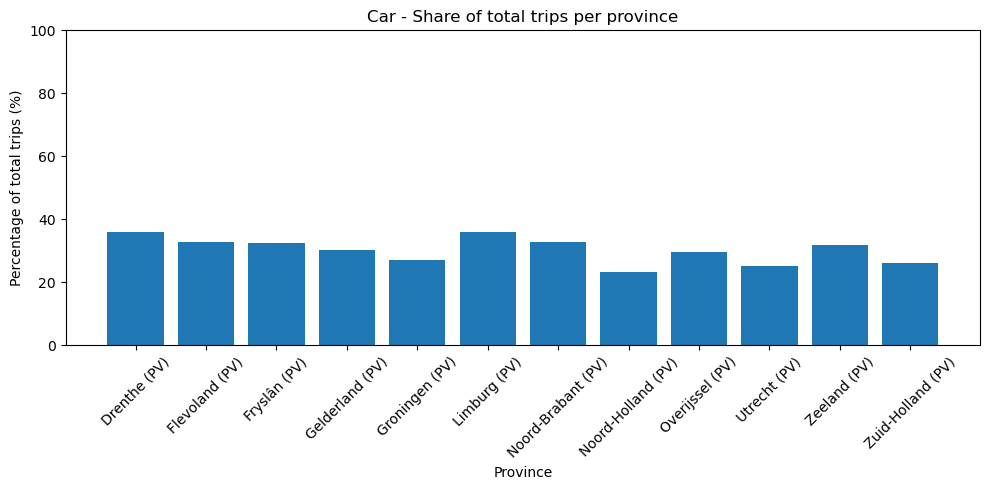

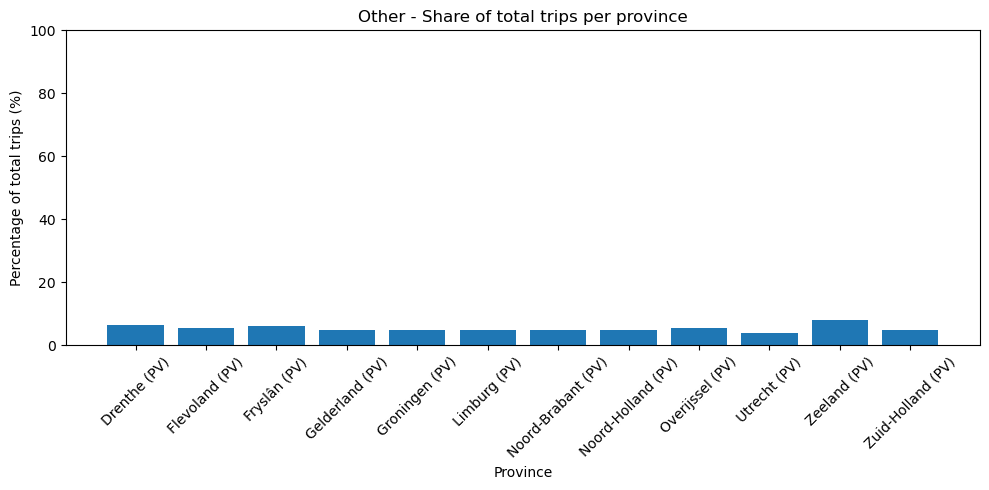

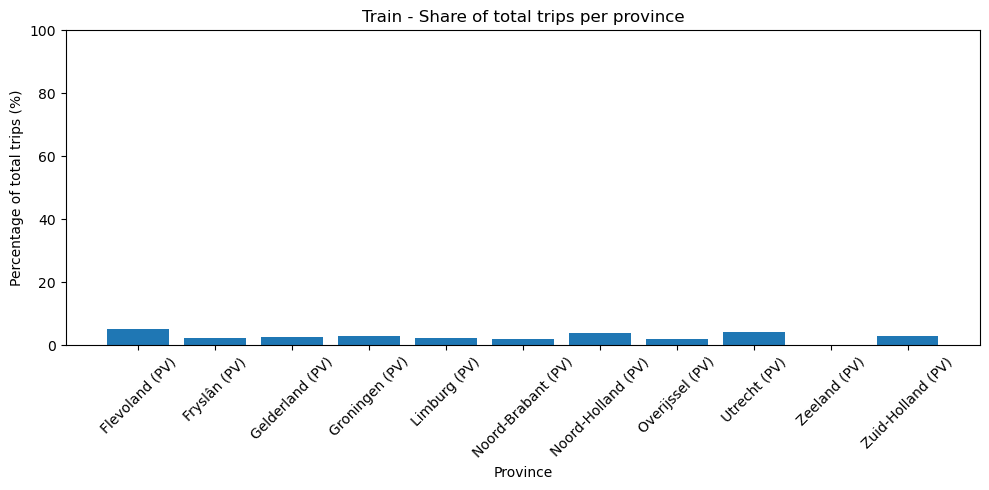

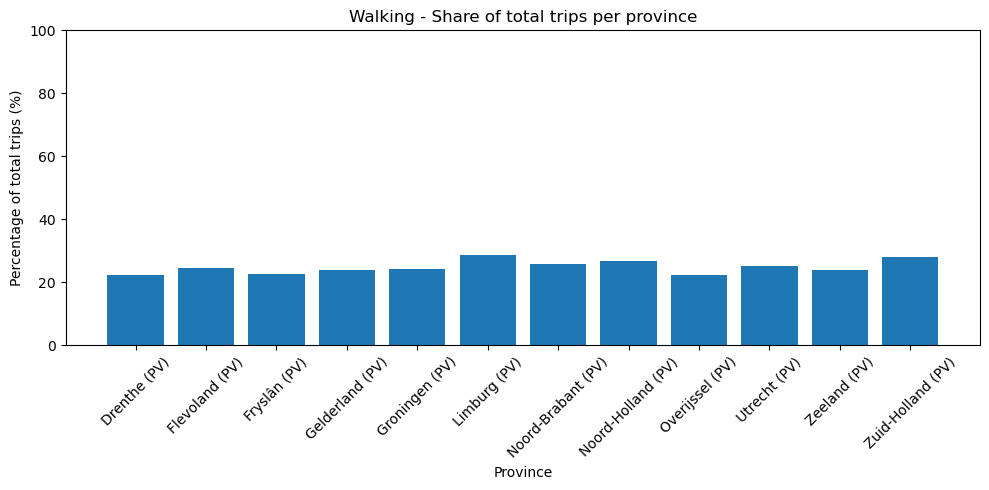

In [54]:
modes = gemiddelde['Travel modes'].unique()
for mode in modes:
    subset = gemiddelde[gemiddelde['Travel modes'] == mode]
    plt.figure(figsize=(10,5))
    plt.bar(subset['Regions'], subset['percentage'])
    plt.title(f"{mode} - Share of total trips per province")
    plt.xlabel("Province")
    plt.ylabel("Percentage of total trips (%)")
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # optioneel, voor vergelijkbare schaal
    plt.tight_layout()
    plt.show()

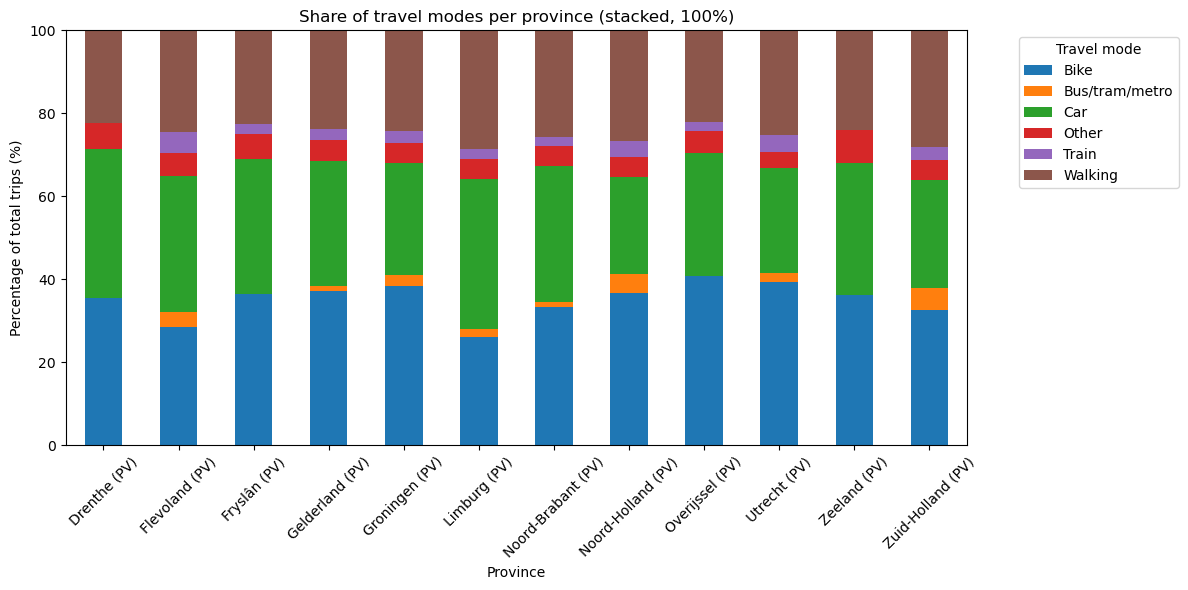

In [55]:
pivot_df = gemiddelde.pivot_table(
    index='Regions',
    columns='Travel modes',
    values='percentage',
    fill_value=0
)

pivot_df = pivot_df.sort_index()

pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
)

plt.title("Share of travel modes per province (stacked, 100%)")
plt.xlabel("Province")
plt.ylabel("Percentage of total trips (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title="Travel mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()